In [14]:
import numpy as np
import pandas as pd
import math

In [31]:
#LOAD: all Model Testing Files
test_model_1 = pd.read_table('ModelsTestingFinal/test_model_trial5.txt', sep='  ', delimiter=None, header=None)
test_model_2 = pd.read_table('ModelsTestingFinal/test_model_trial6.txt', sep='  ', delimiter=None, header=None)
test_model_3 = pd.read_table('ModelsTestingFinal/test_model_trial7.txt', sep='  ', delimiter=None, header=None)
test_model_4 = pd.read_table('ModelsTestingFinal/test_model_trial8.txt', sep='  ', delimiter=None, header=None)
test_model_5 = pd.read_table('ModelsTestingFinal/test_model_trial9.txt', sep='  ', delimiter=None, header=None)

t1 = test_model_1.drop([test_model_1.columns[0]], axis = 1)
t2 = test_model_2.drop([test_model_2.columns[0]], axis = 1)
t3 = test_model_3.drop([test_model_3.columns[0]], axis = 1)
t4 = test_model_4.drop([test_model_4.columns[0]], axis = 1)
t5 = test_model_5.drop([test_model_5.columns[0]], axis = 1)



/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/anaconda/lib/python3.6/s

In [32]:
#Average NDCG@10 for each model:

avg_ndcg = pd.DataFrame ({'Model 1': [t1.iloc[2000][2]],
                          'Model 2': [t2.iloc[2000][2]],
                          'Model 3': [t3.iloc[2000][2]],
                          'Model 4': [t4.iloc[2000][2]],
                          'Model 5': [t5.iloc[2000][2]]})
avg_ndcg

,Model 1,Model 2,Model 3,Model 4,Model 5
0,0.173312,0.173689,0.174311,0.192524,0.174573


In [33]:
#dropping the avg NDCG@10 value:
tm1 = t1.drop(test_model_1.index[-1])
tm2 = t2.drop(test_model_2.index[-1])
tm3 = t3.drop(test_model_3.index[-1])
tm4 = t4.drop(test_model_4.index[-1])
tm5 = t5.drop(test_model_5.index[-1])

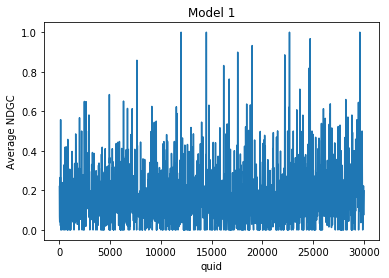

In [34]:
import matplotlib.pyplot as plt
tm1_x1 = tm1[1]
tm1_y1 = tm1[2]
figure = plt.plot(tm1_x1,tm1_y1)
plt.ylabel('Average NDGC')
plt.xlabel('quid')
plt.title('Model 1')
plt.show()



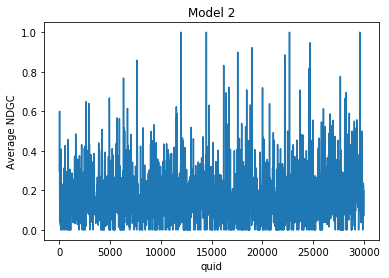

In [35]:
tm1_x1 = tm2[1]
tm1_y1 = tm2[2]
figure = plt.plot(tm1_x1,tm1_y1)
plt.ylabel('Average NDGC')
plt.xlabel('quid')
plt.title('Model 2')
plt.show()



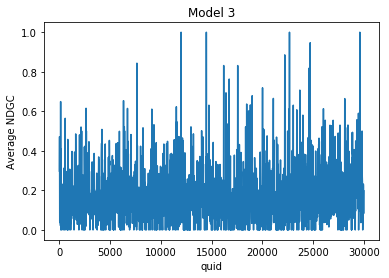

In [36]:
tm1_x1 = tm3[1]
tm1_y1 = tm3[2]
figure = plt.plot(tm1_x1,tm1_y1)
plt.ylabel('Average NDGC')
plt.xlabel('quid')
plt.title('Model 3')
plt.show()

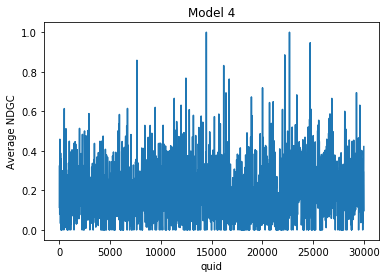

In [37]:
tm1_x1 = tm4[1]
tm1_y1 = tm4[2]
figure = plt.plot(tm1_x1,tm1_y1)
plt.ylabel('Average NDGC')
plt.xlabel('quid')
plt.title('Model 4')
plt.show()

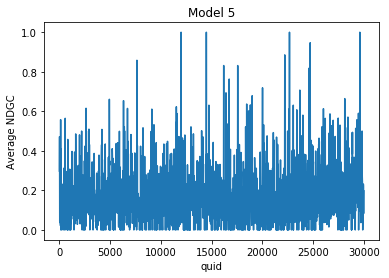

In [38]:
tm1_x1 = tm5[1]
tm1_y1 = tm5[2]
figure = plt.plot(tm1_x1,tm1_y1)
plt.ylabel('Average NDGC')
plt.xlabel('quid')
plt.title('Model 5')
plt.show()

In [39]:
tm1.head(5)

,1,2
0,13,0.219537
1,28,0.067457
2,43,0.041681
3,58,0.047446
4,73,0.137604


In [40]:
tm = pd.concat([tm1, tm2, tm3, tm4, tm5], axis=1, join_axes=[tm1.index])

tm.columns = [0,1,2,3,4,5,6,7,8,9]
test_model_comp = tm.drop(tm.columns[[2,4,6,8]],axis = 1)
test_model_comp.columns = ['quid','Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
test_model_comp.head(10)

,quid,Model 1,Model 2,Model 3,Model 4,Model 5
0,13,0.219537,0.297581,0.297581,0.114313,0.297581
1,28,0.067457,0.599874,0.471689,0.325915,0.471689
2,43,0.041681,0.044426,0.044426,0.079739,0.044426
3,58,0.047446,0.047446,0.047446,0.458709,0.047446
4,73,0.137604,0.036808,0.036808,0.162115,0.036808
5,88,0.148290,0.119605,0.119605,0.218468,0.119605
6,103,0.266264,0.198962,0.219605,0.297667,0.219605
7,118,0.021875,0.021875,0.021875,0.032572,0.021875
8,133,0.557617,0.323447,0.649100,0.388411,0.557617
9,148,0.000000,0.000000,0.000000,0.000000,0.000000


In [73]:
#STUDENT'S T TEST:
# Hypothesis H0 - two models are identical.
# if Student_t output is:
# a) True - H0 should be not rejected
# b) False - H0 should be rejected


def student_t (mod2,mod1):
    difference = mod2 - mod1
    mean = np.mean(difference, axis=0)
    std_dev = np.std(difference,axis = 0)
    N = len(difference)
    sq_root_N = math.sqrt(N)
    t = (mean/std_dev)*sq_root_N
    alpha = 0.05
    """ http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf"""
    t_table = 1.960
    #if t is below the value t_table H0 is true
    H0 = t<=t_table
    return H0


In [74]:
# Model 1 - Model 2,3,4,5 Comparison
Model1 = test_model_comp['Model 1']
Model2 = test_model_comp['Model 2']
Model3 = test_model_comp['Model 3']
Model4 = test_model_comp['Model 4']
Model5 = test_model_comp['Model 5']

mod2_mod1 = student_t (Model2,Model1)
mod3_mod1 = student_t (Model3,Model1)
mod4_mod1 = student_t (Model4,Model1)
mod5_mod1 = student_t (Model5,Model1)

mod2_mod1, mod3_mod1,mod4_mod1, mod5_mod1

(True, True, False, True)

In [75]:
# Model 2 - Model 3,4,5 Comparison
mod3_mod2 = student_t (Model3,Model2)
mod4_mod2 = student_t (Model4,Model2)
mod5_mod2 = student_t (Model5,Model2)

mod3_mod2, mod4_mod2, mod5_mod2

(True, False, True)

In [76]:
# Model 3 - Model 4,5 Comparison
mod4_mod3 = student_t (Model4,Model3)
mod5_mod3 = student_t (Model5,Model3)

mod4_mod3, mod5_mod3

(False, True)

In [77]:
# Model 4 - Model 5 Comparison
mod5_mod4 = student_t (Model5,Model4)

mod5_mod4

True

In [78]:
#Data Table for the Student's t test output
student_t = pd.DataFrame ({
    'Model 5': ['-','-','-','-','-'],
    'Model 4': ['-','-','-','-','-'],
    'Model 3': ['-','-','-','-','-'],
    'Model 2': ['-','-','-','-','-'],
    'Model 1': ['-','-','-','-','-'],
   })

df = student_t.set_index([['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']])

df.set_value('Model 1', 'Model 2', mod2_mod1)
df.set_value('Model 1', 'Model 3', mod3_mod1)
df.set_value('Model 1', 'Model 4', mod4_mod1)
df.set_value('Model 1', 'Model 5', mod5_mod1)

df.set_value('Model 2', 'Model 3', mod3_mod2)
df.set_value('Model 2', 'Model 4', mod4_mod2)
df.set_value('Model 2', 'Model 5', mod5_mod2)

df.set_value('Model 3', 'Model 4', mod4_mod3)
df.set_value('Model 3', 'Model 5', mod5_mod3)

df.set_value('Model 4', 'Model 5', mod5_mod4)

df

,Model 1,Model 2,Model 3,Model 4,Model 5
Model 1,-,True,True,False,True
Model 2,-,-,True,False,True
Model 3,-,-,-,False,True
Model 4,-,-,-,-,True
Model 5,-,-,-,-,-


In [ ]:
"""
Student t test shows that the below models are different:

Model 1 and Model 4
Model 2 and Model 4
Model 3 and Model 4

Therefore Model 4 proves to be the best
Model4 and Model 5 are similar

"""

avg_ndcg